First import all the Afinn class from the afinn package (since Google Colab does not have afinn lib as defalut, 
we need the first line "!pip install ..."

This project is inspired by a blog written by Angelica Lo Duca, which is called Sentiment Analysis of a book through Unsupervised Learning (on medium)

In [15]:
!pip install afinn
from afinn import Afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Then create a new Afinn object, specify the used language as English

In [16]:
afinn = Afinn(language='en')

**Use the score give by Afinn to calculate the sentiment**


---

afinn object contains a method called score(), which receives the sentence as input and would return a score as output (can be postive/neutral/negative). We first define teh three indexes. 

In [17]:
pos_index = []
neg_index = []
neutral_index = []

Open the file-> open()
read all the lines -> file.readlines()

At first encounter the problem of '‘utf8’ codec can’t decode byte 0xa5 in position 0: invalid start byte'

Solved through converting the book into txt file

In [18]:

for book in range(12):
  file = open('/content/' + str(book) + '.txt')
  lines = file.readlines()
  pos = 0
  neg = 0
  neutral = 0
  for line in lines:
    score = int(afinn.score(line))        
    if score > 0:
      pos += 1
    elif score < 0:
      neg += 1
    else:
      neutral += 1
  n = len(lines)
  pos_i = (pos / n)
  neg_i = (neg / n)
  neutral_i = (neutral / n)
  pos_index.append(pos_i)
  neg_index.append(neg_i)
  neutral_index.append(neutral_i)

#now that we get a list of index, indicating how much negative/postive/neutral 
#lang Liuciixn has in his novel
print(pos_index)
print(neg_index)
print(neutral_index)

[0.1582537517053206, 0.21961325966850828, 0.13114754098360656, 0.20689655172413793, 0.18192918192918192, 0.10150375939849623, 0.1736930860033727, 0.16621253405994552, 0.20502092050209206, 0.15950920245398773, 0.1444082519001086, 0.11864406779661017]
[0.15688949522510232, 0.09806629834254144, 0.16830601092896175, 0.09283819628647215, 0.1391941391941392, 0.23308270676691728, 0.11298482293423272, 0.14577656675749318, 0.11297071129707113, 0.1165644171779141, 0.13246471226927253, 0.15254237288135594]
[0.684856753069577, 0.6823204419889503, 0.7005464480874317, 0.7002652519893899, 0.6788766788766789, 0.6654135338345865, 0.7133220910623946, 0.6880108991825613, 0.6820083682008368, 0.7239263803680982, 0.7231270358306189, 0.7288135593220338]


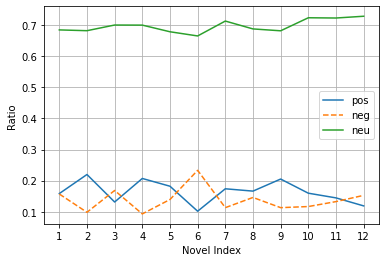

In [20]:
#now we are gonna plot it

import matplotlib.pyplot as plt
import numpy as np

X = np.arange(1,13)
plt.plot(X, pos_index, "-", label='pos')
plt.plot(X, neg_index, "--", label='neg')
plt.plot(X, neutral_index, "-", label='neu')
plt.legend()
plt.xticks(X)
plt.xlabel('Novel Index')
plt.ylabel('Ratio')
plt.grid()
plt.show()

In [21]:
pos_book = 0
neg_book = 0
neutral_book = 0

for book in range(12):
  if(pos_index[book]<neg_index[book]):
    neg_book += 1
  if(pos_index[book]>neg_index[book]):
    pos_book += 1
  else:
    neutral_book += 1

print('The number of more positive novels is: ', pos_book,'/12')
print('The number of more negative novels is: ', neg_book,'/12')
print('The number of neutral novels is: ', neutral_book,'/12')

The number of more positive novels is:  9 /12
The number of more negative novels is:  3 /12
The number of neutral novels is:  3 /12
